In [1]:
!git clone https://github.com/MaanavS16/MaskOn

Cloning into 'MaskOn'...
remote: Enumerating objects: 1475, done.
remote: Total 1475 (delta 0), reused 0 (delta 0), pack-reused 1475
Receiving objects: 100% (1475/1475), 72.51 MiB | 10.17 MiB/s, done.


In [2]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augment training data
train_datagen = ImageDataGenerator(rescale=1/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# don't augment validation data
val_datagen = ImageDataGenerator(rescale=1/255)

# load training data
train_generator = train_datagen.flow_from_directory(
        '/content/MaskOn/tensorflowModel/maskData/train',
        target_size = (256, 256),
        batch_size = 50,
        class_mode = 'binary')

# load validation data
val_generator = val_datagen.flow_from_directory(
        '/content/MaskOn/tensorflowModel/maskData/val',
        target_size = (256, 256),
        batch_size = 50,
        class_mode = 'binary')

# define keras model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), input_shape = (256, 256, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

# compile and print model summary
model.compile(loss ="binary_crossentropy", optimizer='adam', metrics=['acc'])
model.summary()



Found 1411 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_______________________________________

In [3]:
# train and store accuracy and loss over time
history = model.fit(train_generator, epochs=10, validation_data = val_generator)



Epoch 1/10
29/29 [==============================] - 27s 938ms/step - loss: 0.6339 - acc: 0.6003 - val_loss: 0.2269 - val_acc: 0.9225
Epoch 2/10
29/29 [==============================] - 27s 939ms/step - loss: 0.3527 - acc: 0.8512 - val_loss: 0.1176 - val_acc: 0.9507
Epoch 3/10
29/29 [==============================] - 27s 916ms/step - loss: 0.2164 - acc: 0.9199 - val_loss: 0.0992 - val_acc: 0.9718
Epoch 4/10
29/29 [==============================] - 27s 928ms/step - loss: 0.2731 - acc: 0.8894 - val_loss: 0.1282 - val_acc: 0.9437
Epoch 5/10
29/29 [==============================] - 27s 929ms/step - loss: 0.1823 - acc: 0.9383 - val_loss: 0.0256 - val_acc: 0.9930
Epoch 6/10
29/29 [==============================] - 27s 920ms/step - loss: 0.1527 - acc: 0.9490 - val_loss: 0.0324 - val_acc: 0.9859
Epoch 7/10
29/29 [==============================] - 27s 922ms/step - loss: 0.1453 - acc: 0.9419 - val_loss: 0.0211 - val_acc: 0.9930
Epoch 8/10
29/29 [==============================] - 26s 907ms/step - 

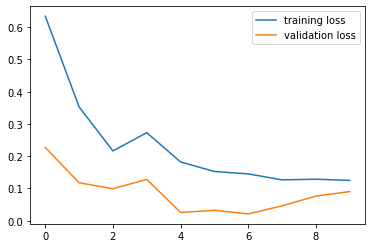

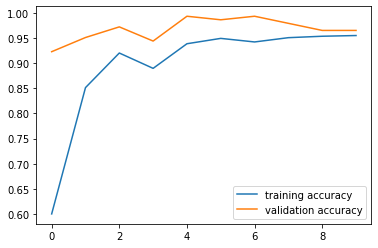

In [4]:
import matplotlib.pyplot as plt

# get training history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = list(range(len(loss)))

# plot loss and accuracy vs epochs
plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.show()

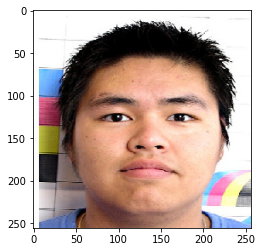

(1, 256, 256, 3)
prediction: not wearing mask


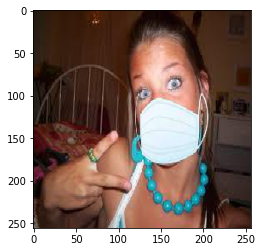

(1, 256, 256, 3)
prediction: wearing mask


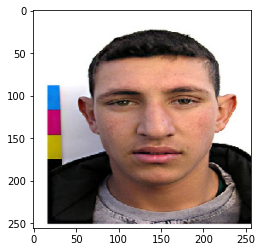

(1, 256, 256, 3)
prediction: not wearing mask


In [30]:

# load and reshape image for testing
testPaths = ['/content/MaskOn/tensorflowModel/maskData/val/without_mask/199.jpg','/content/MaskOn/tensorflowModel/maskData/val/with_mask/208-with-mask.jpg', '/content/MaskOn/tensorflowModel/maskData/val/without_mask/25.jpg']
for path in testPaths:
  img = image.load_img(path, target_size=(256, 256))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  print(x.shape)

  # make and print predictions
  preds = model.predict(x)
  #print(preds)

  if round(preds[0][0]) == 0:
    print("prediction: wearing mask")
  else:
    print("prediction: not wearing mask")